# Smart Substitution Model - Clustering Approach (KMeans)

- Name: M.H.Bethmi Kisalka
- Student ID: s224028677

The clustering approach using KMeans, groups similar products into clusters using feature vectors and then swap within clusters to the cheapest viable option based on product price.



---






## Feature Selection and Preprocessing:

For the clustering the below features were selected:


*   'product_code'
*   'name'
*   'brand'
*   'brand_tier'
*   'category'
*   'subcategory'
*   'original_price'
*   'sale_price'
*   'std_item_size'
*   'std_item_size_unit'
*   'item_size'
*   'price_per_unit'
*   'unit_type'


---



Since KMeans clustering approach cannot handle missing values, important missing values were imputed while other missing values were dropped.

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/smart_substitution/

/content/drive/MyDrive/smart_substitution


In [ ]:
# import libraries
import pandas as pd
import numpy as np

In [ ]:
# read final dataset
data = pd.read_csv('smart_substitution_dataset.csv')

In [ ]:
data.head()

,product_code,name,brand,brand_confidence,brand_tier,category,subcategory,original_price,sale_price,std_item_size,std_item_size_unit,item_size,price_per_unit,unit_type,size_band,tags,similarity_score
0,8371390,coles hot cross buns traditional fruit,coles,store_brand,store,easter,easter,4.4,3.0,6.0,pack,6.02740,0.7300,each,mixed,"['coles', 'cross', 'buns', 'fruit']",0.179609
1,7473849,coles hot cross buns choc chip,coles,store_brand,store,easter,easter,4.4,3.0,6.0,pack,6.02740,0.7300,each,mixed,"['coles', 'cross', 'buns', 'choc', 'chip']",0.179609
2,5726070,coles hot cross buns traditional fruit mini,coles,store_brand,store,easter,easter,4.4,3.0,9.0,pack,8.97959,0.4900,each,mixed,"['coles', 'cross', 'buns', 'fruit']",0.179609
3,7107738,cadbury dairy milk chocolate easter egg hunt c...,cadbury,raw_at_start,branded,easter,easter,8.0,8.0,306.0,g,306.51341,0.0261,g,large,"['cadbury', 'dairy', 'milk', 'chocolate', 'eas...",0.212367
4,4885191,cadbury dairy milk easter chocolate eggs bag,cadbury,raw_at_start,branded,easter,easter,6.7,6.7,114.0,g,113.94558,0.0588,g,small,"['cadbury', 'dairy', 'milk', 'easter', 'chocol...",0.208974


In [ ]:
data.shape

(24897, 17)

In [ ]:
data.dtypes

,0
product_code,int64
name,object
brand,object
brand_confidence,object
brand_tier,object
category,object
subcategory,object
original_price,float64
sale_price,float64
std_item_size,float64


In [ ]:
# check for missing values
data.isna().sum()

,0
product_code,0
name,9
brand,22
brand_confidence,0
brand_tier,0
category,0
subcategory,0
original_price,0
sale_price,0
std_item_size,19830


In [ ]:
# drop unnecessary columns
drop_columns = ['size_band','tags','similarity_score','brand_confidence']
data.drop(drop_columns,axis=1, inplace=True)

In [ ]:
data.columns

Index(['product_code', 'name', 'brand', 'brand_tier', 'category',
       'subcategory', 'original_price', 'sale_price', 'std_item_size',
       'std_item_size_unit', 'item_size', 'price_per_unit', 'unit_type'],
      dtype='object')

In [ ]:
data = data.dropna(subset=["item_size", "price_per_unit", "unit_type"], how="all")

In [ ]:
data.isna().sum()

,0
product_code,0
name,9
brand,22
brand_tier,0
category,0
subcategory,0
original_price,0
sale_price,0
std_item_size,18959
std_item_size_unit,18959


In [ ]:
data[data['std_item_size'].isna() & data['std_item_size_unit'].isna()]

,product_code,name,brand,brand_tier,category,subcategory,original_price,sale_price,std_item_size,std_item_size_unit,item_size,price_per_unit,unit_type
150,1010087,colby cheese block,colby,branded,cheese dairy,cheese blocks,10.30,9.0,NaN,NaN,572.222220,0.01800,g
151,3842193,haloumi,haloumi,branded,cheese dairy,mixed,6.60,5.8,NaN,NaN,204.841710,0.03222,g
152,6138179,ginger,ginger,branded,medicinal products,mixed,5.50,4.5,NaN,NaN,12.222220,0.45000,each
153,6127365,pads organic day regular,pads,branded,sanitary protection,mixed,5.90,4.5,NaN,NaN,13.111110,0.45000,each
154,6126690,tampons 100 organic cotton regular,tampons,branded,sanitary protection,tampons,5.90,4.5,NaN,NaN,21.071430,0.28000,each
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24892,6131974,shredded meals beef dog food,shredded,branded,pet food,dog food,1.90,1.3,NaN,NaN,146.153850,0.01300,g
24893,9113356,complete care adult dog food with lamb,complete,branded,pet food,dog food,3.00,2.4,NaN,NaN,500.000000,0.00600,g
24894,4505836,grainfree chicken mince cat food,grainfree,branded,pet food,cat food,2.75,2.2,NaN,NaN,500.000000,0.00550,g
24895,3822899,deodorant aerosol africa,deodorant,branded,mens deos & grooming,mixed,0.00,11.5,NaN,NaN,250.000000,0.04600,ml


In [ ]:
# fill na
data['std_item_size'] = data['std_item_size'].fillna(data['item_size'])
data['std_item_size_unit'] = data['std_item_size_unit'].fillna(data['unit_type'])

In [ ]:
data.isna().sum()

,0
product_code,0
name,9
brand,22
brand_tier,0
category,0
subcategory,0
original_price,0
sale_price,0
std_item_size,0
std_item_size_unit,0


In [ ]:
data[data['brand'].isna()]

,product_code,name,brand,brand_tier,category,subcategory,original_price,sale_price,std_item_size,std_item_size_unit,item_size,price_per_unit,unit_type
9379,3942609,NaN,NaN,branded,spirits,mixed,0.0,19.9,750.000000,ml,750.094233,0.02653,ml
12387,1050219,NaN,NaN,branded,seasonal events,seasonal events,0.0,6.0,4.000000,pk,1.000000,1.50000,each
13938,8183323,NaN,NaN,branded,kitchenware,kitchenware,0.0,13.5,1.000000,each,1.000000,4.50000,each
14104,9038046,NaN,NaN,branded,seasonal events,seasonal events,0.0,12.0,2.000000,pack,1.000000,6.00000,each
18131,4161668,nan supremepro 1 infant formula for newborns s...,NaN,branded,infant formula,infant formula,0.0,38.0,1.000000,infant,800.000000,0.04750,g
18132,4161690,nan supremepro 2 followon baby formula 612 mon...,NaN,branded,infant formula,infant formula,0.0,38.0,2.000000,follow,800.000000,0.04750,g
18133,4161840,nan supremepro 3 toddler milk drink from 1 year,NaN,branded,infant formula,infant formula,0.0,30.0,3.000000,toddler,800.000000,0.03750,g
18134,4161872,nan supremepro 4 toddler milk drink stage 4,NaN,branded,infant formula,infant formula,0.0,30.0,4.000000,toddler,800.000000,0.03750,g
18135,4161883,nan optipro 1 infant formula for newborns suit...,NaN,branded,infant formula,infant formula,0.0,29.0,1.000000,infant,798.898072,0.03630,g
18136,4161974,nan optipro 2 followon baby formula from 6 to ...,NaN,branded,infant formula,infant formula,0.0,29.0,2.000000,follow,798.898072,0.03630,g


In [ ]:
# drop products that do not have a product name or brand
data = data.dropna(subset=['name','brand'])

In [ ]:
data.isna().sum()

,0
product_code,0
name,0
brand,0
brand_tier,0
category,0
subcategory,0
original_price,0
sale_price,0
std_item_size,0
std_item_size_unit,0


In [ ]:
data['subcategory'].unique()

array(['easter', "footy's back", 'bonus credit products',
       'meat & seafood', 'fruit & vegetables', 'dairy, eggs & fridge',
       'bakery', 'deli', 'pantry', 'dietary & world foods',
       'chips, chocolates & snacks', 'drinks', 'frozen', 'household',
       'health & beauty', 'cheese blocks', 'mixed', 'tampons',
       'nut butters', 'baby cereals', 'bakery packaged cake',
       'picnic pool bbq acc', 'continental', 'diffusers', 'pain relief',
       'cold & flu', 'frozen desserts', 'shampoo', 'international foods',
       'surface cleaners', 'chilled spreads', 'colas', 'instant noodles',
       'poultry (mt)', 'chips/crisps', 'seafood deli',
       'bread rolls & fbread', 'lemonades', 'condiments',
       'apples & pears', 'value added fp', 'smallgoods dy',
       'desserts (gr)', 'pickled vegetables', 'gourmet cheese',
       'kitchen needs/bags', 'pork', 'paper towels', 'rice', 'biscuits',
       'water', 'instore bread', 'facial tissues', 'spec/fresh cheese',
       'froze

In [ ]:
len(data['subcategory'].unique())

271

In [ ]:
len(data['category'].unique())

184

In [ ]:
data['brand_tier'].unique()

array(['store', 'branded'], dtype=object)

In [ ]:
data['unit_type'].unique()

array(['each', 'g', 'ml', 'm', 'kgm'], dtype=object)

## **Implementation of KMeans Clustering**

**The process of applying KMeans clustering for a smart substitution model involves the below steps:**



1.   Cluster each product using the feature vector.
2.   Find alternative products for a given cluster within the same cluster with appropriate conditions. (`find_alternatives()` method).
3.   Optimize Cart by showing all alternative products with total savings and optimized amount.



**KMeans Clustering:**



*   Elbow method to find the opitmal number of clusters.
*   Silhouette Score to observe the quality of clusters.



**The Process of Finding Alternatives:**

 It finds the cheaper alternatives in the same cluster.

*   Find the cluster assignment of the product of interest.
*   Find other products under the same cluster (excluding the product itself).
*   Filter for cheap options where `sale_price` is lower than the target product's sale price.





In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

class ProductClusteringOptimizer:
    """
    Groups similar products into clusters using feature vectors,
    then recommends cheapest viable alternatives within clusters.
    """

    def __init__(self, clustering_method: str = 'kmeans', n_clusters: int = 50, random_state: int = 42):
        """
        Initialize the optimizer.

        Args:
            clustering_method: 'kmeans' or 'hdbscan'
            n_clusters: Number of clusters for K-means (ignored for HDBSCAN)
        """
        self.clustering_method = clustering_method
        self.n_clusters = n_clusters
        self.random_state = random_state

        # Model components
        self.scaler = StandardScaler()
        self.onehot_encoder = None
        self.cluster_model = None
        self.label_encoders = {}
        self.feature_columns = []
        self.df = None
        self.feature_matrix = None
        self.clusters = None
        # self.pipeline = None

    def _encode_categorical_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """One-hot encode subcategory and encode other categorical features."""
        df_encoded = df.copy()
        drop_columns = ['product_code', 'name']
        df_encoded.drop(drop_columns,axis=1, inplace=True)

        # One-hot encode subcategory
        one_hot_cols = ['brand','category', 'new_subcategory']
        self.onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        one_hot_encoded = self.onehot_encoder.fit_transform(df_encoded[one_hot_cols].astype(str))
        one_hot_df = pd.DataFrame(one_hot_encoded,
                                  columns = self.onehot_encoder.get_feature_names_out(one_hot_cols),
                                  index=df_encoded.index)

        # append one hot encoded columns
        df_encoded = pd.concat([df_encoded, one_hot_df], axis=1)

        # Label encode other categorical features
        categorical_cols = ['unit_type', 'brand_tier', 'std_item_size_unit']
        for col in categorical_cols:
            if col in df_encoded.columns:
                le = LabelEncoder()
                df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col].astype(str))
                self.label_encoders[col] = le

        # Drop the original raw categorical columns now
        df_encoded.drop(one_hot_cols + categorical_cols, axis=1, inplace=True)

        return df_encoded

    def _create_feature_vector(self, df_encoded: pd.DataFrame) -> np.ndarray:
        """Create feature matrix from encoded dataframe."""
        categorical_features = [col for col in df_encoded.columns
                            if any(col.startswith(c) for c in ["brand_", "category_", "new_subcategory_", "unit_type_", "std_item_size_unit_", "brand_tier_"])]
        # Add numerical features
        numerical_features = ['original_price','sale_price','std_item_size','price_per_unit',]

        self.feature_columns = numerical_features + categorical_features

         # Scale numeric features
        X_numeric = df_encoded[numerical_features].values
        X_categorical = df_encoded[categorical_features].values

        return np.hstack([X_numeric, X_categorical]), numerical_features, categorical_features

    def prepare_features(self, df:pd.DataFrame) -> 'ProductClusteringOptimizer':
        self.df = df.copy().reset_index(drop=True)

        # Encode categorical features
        df_encoded = self._encode_categorical_features(self.df)

        # Create feature matrix (unscaled)
        self.feature_matrix, numerical_features, categorical_features = self._create_feature_vector(df_encoded)

        # Scale only numeric features
        scaled_numeric = self.scaler.fit_transform(self.df[numerical_features])
        X = np.hstack([scaled_numeric, df_encoded[categorical_features].values])

        # Save scaled matrix
        self.feature_matrix_scaled = X

        return self

    def fit(self) -> 'ProductClusteringOptimizer':
        """
        Fit the clustering model on the product data.

        Args:
            df: DataFrame with product information

        Returns:
            self for method chaining
        """
        if self.feature_matrix_scaled is None:
            raise ValueError("Must preprocess data.")

        # Apply clustering
        if self.clustering_method.lower() == 'kmeans':
            self.cluster_model = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        elif self.clustering_method.lower() == 'hdbscan':
            self.cluster_model = HDBSCAN(min_cluster_size=3, min_samples=2)
        else:
            raise ValueError("clustering_method must be 'kmeans' or 'hdbscan'")

        self.clusters = self.cluster_model.fit_predict(self.feature_matrix_scaled)
        self.df['cluster'] = pd.Series(self.clusters, index=self.df.index)

        return self

    def plot_elbow_method(self, max_k: int=50) -> None:
        """
        Use the ELbow method to find a good number of clusters for KMeans
        """
        if self.feature_matrix_scaled is None:
          raise ValueError("Must preprocess data.")

        inertias = []
        K = range(2, max_k+1)
        for k in K:
            model = KMeans(n_clusters=k, random_state=self.random_state, n_init=5)
            model.fit(self.feature_matrix_scaled)

            inertias.append(model.inertia_)
        # Plot
        plt.figure(figsize=(8,5))
        plt.plot(K, inertias, 'bo-', markersize=6)
        plt.xlabel("Number of Clusters (k)")
        plt.ylabel("Inertia (WCSS)")
        plt.title("ELbow Method for Optimal k")
        plt.show()

    def get_cluster_quality_metrics(self) -> Dict[str, float]:
        """Calculate clustering quality metrics."""
        if self.clusters is None:
            raise ValueError("Model must be fitted first")

        # Silhouette score
        silhouette = silhouette_score(self.feature_matrix_scaled, self.clusters)

        # Number of clusters
        n_clusters = len(np.unique(self.clusters[self.clusters >= 0]))  # Exclude noise points for HDBSCAN

        # Cluster size statistics
        cluster_sizes = pd.Series(self.clusters).value_counts()
        avg_cluster_size = cluster_sizes.mean()

        return {
            'silhouette_score': silhouette,
            'n_clusters': n_clusters,
            'avg_cluster_size': avg_cluster_size,
            'min_cluster_size': cluster_sizes.min(),
            'max_cluster_size': cluster_sizes.max()
        }

    def visualize_clusters(self, figsize: Tuple[int, int] = (12, 8)) -> None:
        """Visualize clusters using PCA dimensionality reduction."""
        if self.clusters is None:
            raise ValueError("Model must be fitted first")

        # Apply PCA for visualization
        pca = PCA(n_components=2, random_state=42)
        features_2d = pca.fit_transform(self.feature_matrix_scaled)

        plt.figure(figsize=figsize)

        # Plot clusters
        unique_clusters = np.unique(self.clusters)
        colors = plt.cm.Set3(np.linspace(0, 1, len(unique_clusters)))

        for cluster_id, color in zip(unique_clusters, colors):
            mask = self.clusters == cluster_id
            label = f'Cluster {cluster_id}' if cluster_id >= 0 else 'Noise'
            plt.scatter(features_2d[mask, 0], features_2d[mask, 1],
                       c=[color], label=label, alpha=0.7, s=50)

        plt.title(f'Product Clusters ({self.clustering_method.upper()})\n'
                 f'Silhouette Score: {self.get_cluster_quality_metrics()["silhouette_score"]:.3f}')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    def find_alternatives(self, product_code: str, max_alternatives: int = 5) -> List[Dict]:
        """
        Find cheaper alternatives for a given product.

        Args:
            product_code: Code of the product to find alternatives for
            max_alternatives: Maximum number of alternatives to return

        Returns:
            List of alternative products with their details and savings
        """
        if self.clusters is None:
            raise ValueError("Model must be fitted first")

        # Find the target product
        target_mask = self.df['product_code'] == product_code
        if not target_mask.any():
            raise ValueError(f"Product code {product_code} not found")

        target_product = self.df[target_mask].iloc[0]
        target_cluster = target_product['cluster']

        # If product is in noise cluster (HDBSCAN), return empty list
        if target_cluster == -1:
            return []

        # Find products in the same cluster + same category + same subcategory
        cluster_products = self.df[
            (self.df['cluster'] == target_cluster) &
            (self.df['product_code'] != product_code) &
            (self.df['category'] == target_product['category']) &
            (self.df['subcategory'] == target_product['subcategory'])
        ].copy()

        # If none found, relax to same category only
        if cluster_products.empty:
          cluster_products = self.df[
              (self.df['cluster'] == target_cluster) &
              (self.df['product_code'] != product_code) &
              (self.df['category'] == target_product['category'])
          ].copy()

        if cluster_products.empty:
            return []

        # Filter to only cheaper alternatives
        cheaper_alternatives = cluster_products[
            cluster_products['sale_price'] < target_product['sale_price']
        ].copy()

        if cheaper_alternatives.empty:
            return []

        # Calculate savings and sort by price
        cheaper_alternatives['savings'] = target_product['sale_price'] - cheaper_alternatives['sale_price']
        cheaper_alternatives['savings_pct'] = (cheaper_alternatives['savings'] / target_product['sale_price']) * 100

        # Sort by sale price (cheapest first)
        cheaper_alternatives = cheaper_alternatives.sort_values('sale_price')

        # Prepare results
        alternatives = []
        for _, alt in cheaper_alternatives.head(max_alternatives).iterrows():
            alternatives.append({
                'product_code': alt['product_code'],
                'name': alt['name'],
                'brand': alt['brand'],
                'brand_tier': alt['brand_tier'],
                'original_price': alt['sale_price'],
                'savings': alt['savings'],
                'savings_pct': alt['savings_pct'],
                'price_per_unit': alt['price_per_unit'],
                'cluster_id': alt['cluster']
            })

        return alternatives

    def optimize_cart(self, cart_product_codes: List[str]) -> Dict:
        """
        Optimize an entire cart by finding alternatives for all items.

        Args:
            cart_product_codes: List of product codes in the cart

        Returns:
            Dictionary with optimization results
        """
        if self.clusters is None:
            raise ValueError("Model must be fitted first")

        original_total = 0
        optimized_total = 0
        recommendations = {}
        items_with_alternatives = 0

        for product_code in cart_product_codes:
            try:
                # Get original product details
                original_product = self.df[self.df['product_code'] == product_code].iloc[0]
                original_price = original_product['sale_price']
                original_total += original_price

                # Find alternatives
                alternatives = self.find_alternatives(product_code, max_alternatives=3)

                if alternatives:
                    best_alternative = alternatives[0]  # Cheapest option
                    optimized_total += best_alternative['original_price']
                    items_with_alternatives += 1

                    recommendations[product_code] = {
                        'original_name': original_product['name'],
                        'original_price': original_price,
                        'alternatives': alternatives,
                        'best_alternative': best_alternative
                    }
                else:
                    optimized_total += original_price
                    recommendations[product_code] = {
                        'original_name': original_product['name'],
                        'original_price': original_price,
                        'alternatives': [],
                        'best_alternative': None
                    }

            except (IndexError, ValueError) as e:
                print(f"Warning: Could not process product {product_code}: {e}")
                continue

        total_savings = original_total - optimized_total
        savings_pct = (total_savings / original_total * 100) if original_total > 0 else 0

        return {
            'original_total': original_total,
            'optimized_total': optimized_total,
            'total_savings': total_savings,
            'savings_percentage': savings_pct,
            'items_with_alternatives': items_with_alternatives,
            'total_items': len(cart_product_codes),
            'recommendations': recommendations
        }

    def substitution_summary(self, cart_results:Dict) -> pd.DataFrame:
      """
      Create a summary table comparing original products and their substitutions.
      """

      records = []
      for product_code, rec in cart_results['recommendations'].items():
        original_name = rec['original_name']
        original_price = rec['original_price']

        if rec['best_alternative']:
          alt = rec['best_alternative']
          records.append({
              "original_code": product_code,
              "original_name": original_name,
              "original_price": original_price,
              "alt_code": alt["product_code"],
              "alt_name": alt["name"],
              "alt_price": alt["original_price"],
              "savings": alt["savings"],
              "savings_pct": alt["savings_pct"]
          })
        else:
          records.append({
                "original_code": product_code,
                "original_name": original_name,
                "original_price": original_price,
                "alt_code": None,
                "alt_name": "No substitute found",
                "alt_price": None,
                "savings": 0,
                "savings_pct": 0
            })

        return pd.DataFrame(records)


    def analyze_cluster(self, cluster_id: int) -> Dict:
        """Analyze a specific cluster's characteristics."""
        if self.clusters is None:
            raise ValueError("Model must be fitted first")

        cluster_products = self.df[self.df['cluster'] == cluster_id]

        if cluster_products.empty:
            return {'error': f'No products found in cluster {cluster_id}'}

        analysis = {
            'cluster_id': cluster_id,
            'size': len(cluster_products),
            'subcategories': cluster_products['subcategory'].value_counts().to_dict(),
            'brands': cluster_products['brand'].value_counts().to_dict(),
            'brand_tiers': cluster_products['brand_tier'].value_counts().to_dict(),
            'price_range': {
                'min': cluster_products['sale_price'].min(),
                'max': cluster_products['sale_price'].max(),
                'mean': cluster_products['sale_price'].mean(),
                'std': cluster_products['sale_price'].std()
            },
            'sample_products': cluster_products[['name', 'brand', 'sale_price']].head().to_dict('records')
        }

        return analysis


### **Implement KMeans Clustering with K=20 for demonstration:**

In [ ]:
def demo_with_sample_data():

    # Initialize and fit the optimizer
    optimizer = ProductClusteringOptimizer(
        clustering_method='kmeans',
        n_clusters=20  # Small number for demo
    )

    print("Fitting clustering model...")
    print(optimizer.prepare_features(data))
    optimizer.plot_elbow_method(max_k=40)
    print(data.columns)
    print(data.head())


    # Show cluster quality metrics
    metrics = optimizer.get_cluster_quality_metrics()
    print(f"Clustering Quality Metrics:")
    print(f"- Silhouette Score: {metrics['silhouette_score']:.3f}")
    print(f"- Number of Clusters: {metrics['n_clusters']}")
    print(f"- Average Cluster Size: {metrics['avg_cluster_size']:.1f}")
    print("\n" + "="*80 + "\n")

    # Analyze clusters
    print("Cluster Analysis:")
    for cluster_id in sorted(optimizer.df['cluster'].unique()):
        if cluster_id >= 0:  # Skip noise points
            analysis = optimizer.analyze_cluster(cluster_id)
            print(f"\nCluster {cluster_id}:")
            print(f"  Size: {analysis['size']} products")
            print(f"  Subcategories: {analysis['subcategories']}")
            print(f"  Brands: {analysis['brands']}")
            print(f"  Price range: ${analysis['price_range']['min']:.2f} - ${analysis['price_range']['max']:.2f}")

    print("\n" + "="*80 + "\n")

    optimizer.visualize_clusters()
    # Demo individual product alternatives
    print("Finding Alternatives for Individual Products:")
    for product_code in [8371390, 5726070]:  # Test a few products
        try:
            product_name = data[data['product_code'] == product_code]['name'].iloc[0]
            alternatives = optimizer.find_alternatives(product_code)

            print(f"\nProduct: {product_name} (Code: {product_code})")
            if alternatives:
                print(f"Found {len(alternatives)} cheaper alternatives:")
                for i, alt in enumerate(alternatives, 1):
                    print(f"  {i}. {alt['name']}")
                    print(f"     Price: ${alt['original_price']:.2f} (Save ${alt['savings']:.2f}, {alt['savings_pct']:.1f}%)")
                    print(f"     Brand: {alt['brand']} ({alt['brand_tier']})")
            else:
                print("  No cheaper alternatives found in cluster")
        except Exception as e:
            print(f"  Error finding alternatives: {e}")

    print("\n" + "="*80 + "\n")

    # Demo cart optimization
    print("Cart Optimization Demo:")
    sample_cart = [8371390, 7107738, 4885191]  # Sample cart
    cart_results = optimizer.optimize_cart(sample_cart)

    print(f"Original cart total: ${cart_results['original_total']:.2f}")
    print(f"Optimized cart total: ${cart_results['optimized_total']:.2f}")
    print(f"Total savings: ${cart_results['total_savings']:.2f} ({cart_results['savings_percentage']:.1f}%)")
    print(f"Items with alternatives: {cart_results['items_with_alternatives']}/{cart_results['total_items']}")

    print("\nDetailed Recommendations:")
    for product_code, rec in cart_results['recommendations'].items():
        print(f"\n{rec['original_name']} (${rec['original_price']:.2f})")
        if rec['best_alternative']:
            alt = rec['best_alternative']
            print(f"  → Recommended: {alt['name']}")
            print(f"    Price: ${alt['original_price']:.2f} (Save ${alt['savings']:.2f})")
        else:
            print(f"  → No cheaper alternatives found")

    return optimizer

Fitting clustering model...
Index(['product_code', 'name', 'brand', 'brand_tier', 'category',
       'subcategory', 'original_price', 'sale_price', 'std_item_size',
       'std_item_size_unit', 'item_size', 'price_per_unit', 'unit_type'],
      dtype='object')
   product_code                                               name    brand  \
0       8371390             coles hot cross buns traditional fruit    coles   
1       7473849                     coles hot cross buns choc chip    coles   
2       5726070        coles hot cross buns traditional fruit mini    coles   
3       7107738  cadbury dairy milk chocolate easter egg hunt c...  cadbury   
4       4885191       cadbury dairy milk easter chocolate eggs bag  cadbury   

  brand_tier category subcategory  original_price  sale_price  std_item_size  \
0      store   easter      easter             4.4         3.0            6.0   
1      store   easter      easter             4.4         3.0            6.0   
2      store   easter   

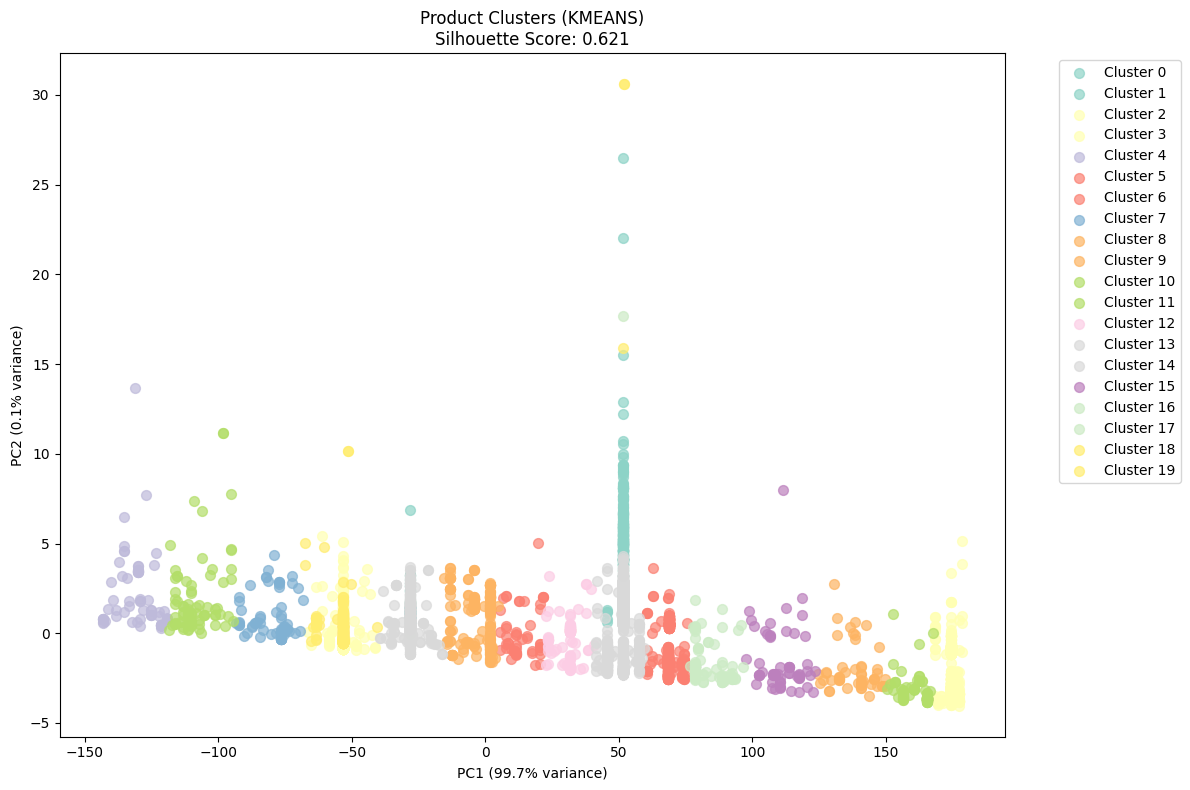

Finding Alternatives for Individual Products:

Product: coles hot cross buns traditional fruit (Code: 8371390)
Found 5 cheaper alternatives:
  1. swisspers cotton tips paperstems
     Price: $1.10 (Save $1.90, 63.3%)
     Brand: swisspers (branded)
  2. peanut butter cups milk chocolate
     Price: $1.25 (Save $1.75, 58.3%)
     Brand: peanut (branded)
  3. peanut butter cup white
     Price: $1.25 (Save $1.75, 58.3%)
     Brand: peanut (branded)
  4. cup a soup creamy mushroom with croutons
     Price: $1.40 (Save $1.60, 53.3%)
     Brand: cup (branded)
  5. sesame snaps
     Price: $1.50 (Save $1.50, 50.0%)
     Brand: sesame (branded)

Product: coles hot cross buns traditional fruit mini (Code: 5726070)
Found 5 cheaper alternatives:
  1. swisspers cotton tips paperstems
     Price: $1.10 (Save $1.90, 63.3%)
     Brand: swisspers (branded)
  2. peanut butter cups milk chocolate
     Price: $1.25 (Save $1.75, 58.3%)
     Brand: peanut (branded)
  3. peanut butter cup white
     Price:

In [ ]:
optimizer_basic = demo_with_sample_data()



*   The Silhouette Score is approximately 0.621 an average value.
*   Product alternative suggestions are not great.



### **Find Optimal K**

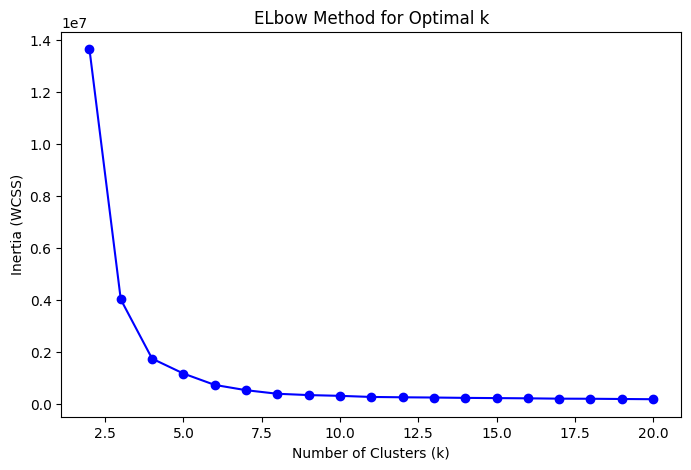

In [ ]:
optimizer = ProductClusteringOptimizer(
        clustering_method='kmeans',
        n_clusters=20  # Small number for demo
    )
optimizer.prepare_features(data)
optimizer.plot_elbow_method(max_k=20)

It is clear that the optimal number of clusters is observed at **k = 4.**

Clustering Quality Metrics:
- Silhouette Score: 0.857
- Number of Clusters: 4
- Average Cluster Size: 5933.8


Cluster Analysis:

Cluster 0:
  Size: 7301 products
  Subcategories: {'mixed': 2718, 'shampoo': 255, 'conditioner': 205, 'red wine': 188, 'beer': 186, 'ice cream tubs': 173, 'liquor rtd': 173, 'makeup': 119, 'white wine': 114, 'surface cleaners': 111, 'body wash': 102, 'oils': 101, 'grocery milk': 99, 'liquid soap': 84, 'sunscreen': 77, 'deodorants': 76, 'whisky': 72, 'kitchenware': 71, 'energy/sport/icedtea': 70, 'cordials': 69, 'dishwashing': 68, 'water': 68, 'cleansers': 57, 'bread rolls & fbread': 57, 'salad dressings': 55, 'moisturiser': 55, 'bakery packaged cake': 53, 'eggs': 52, 'serum': 52, 'gravy/stock': 47, 'vinegar': 43, 'gin': 43, 'cold drink': 42, 'fruit juices': 42, 'kitchen needs/bags': 41, 'mouthwash': 39, 'hair treatments': 39, 'sparkling wine': 38, 'beauty/trial travel': 37, 'desserts (gr)': 35, 'body lotion': 35, 'sauces': 34, 'shaving': 33, 'better for you'

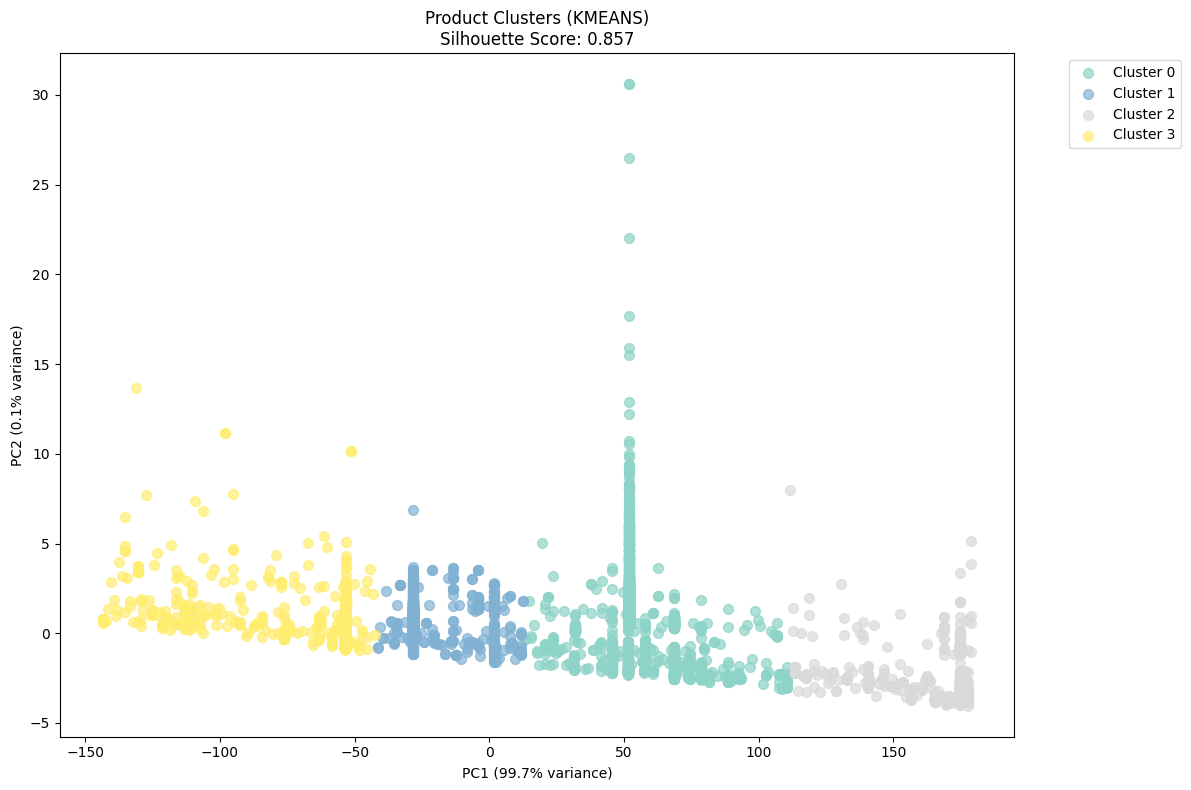

Cart Optimization Demo:
Original cart total: $61.50
Optimized cart total: $23.45
Total savings: $38.05 (61.9%)
Items with alternatives: 7/8

Detailed Recommendations:

coles hot cross buns traditional fruit ($3.00)
  → Recommended: chocolate easter bunnies
    Price: $2.45 (Save $0.55)

cadbury dairy milk chocolate easter egg hunt carton ($8.00)
  → Recommended: easter fried eggs and bunnies gummies
    Price: $2.50 (Save $5.50)

cadbury dairy milk easter chocolate eggs bag ($6.70)
  → Recommended: easter fried eggs and bunnies gummies
    Price: $2.50 (Save $4.20)

ferrero rocher chocolate gift box ($9.00)
  → Recommended: fourn twenty frozen meat pies
    Price: $4.50 (Save $4.50)

sensodyne repair protect toothbrush ($3.00)
  → No cheaper alternatives found

maybelline lash sensational sky high washable mascara blackest black ($17.50)
  → Recommended: sensodyne repair protect toothbrush
    Price: $3.00 (Save $14.50)

sensodyne soft daily care toothbrush ($6.30)
  → Recommended: sen

In [ ]:
# fit kmeans with optimal clusters
optimizer = ProductClusteringOptimizer(
    clustering_method='kmeans',
    n_clusters=4
)
optimizer.prepare_features(data)
optimizer.fit()

# Show cluster quality metrics
metrics = optimizer.get_cluster_quality_metrics()
print(f"Clustering Quality Metrics:")
print(f"- Silhouette Score: {metrics['silhouette_score']:.3f}")
print(f"- Number of Clusters: {metrics['n_clusters']}")
print(f"- Average Cluster Size: {metrics['avg_cluster_size']:.1f}")
print("\n" + "="*80 + "\n")

# Analyze clusters
print("Cluster Analysis:")
for cluster_id in sorted(optimizer.df['cluster'].unique()):
    if cluster_id >= 0:  # Skip noise points
        analysis = optimizer.analyze_cluster(cluster_id)
        print(f"\nCluster {cluster_id}:")
        print(f"  Size: {analysis['size']} products")
        print(f"  Subcategories: {analysis['subcategories']}")
        print(f"  Brands: {analysis['brands']}")
        print(f"  Price range: ${analysis['price_range']['min']:.2f} - ${analysis['price_range']['max']:.2f}")

print("\n" + "="*80 + "\n")

optimizer.visualize_clusters()

print("Cart Optimization Demo:")
sample_cart = [8371390, 7107738, 4885191, 7107738, 229828, 1167759,3959190, 8086371]  # Sample cart
cart_results = optimizer.optimize_cart(sample_cart)

print(f"Original cart total: ${cart_results['original_total']:.2f}")
print(f"Optimized cart total: ${cart_results['optimized_total']:.2f}")
print(f"Total savings: ${cart_results['total_savings']:.2f} ({cart_results['savings_percentage']:.1f}%)")
print(f"Items with alternatives: {cart_results['items_with_alternatives']}/{cart_results['total_items']}")

print("\nDetailed Recommendations:")
for product_code, rec in cart_results['recommendations'].items():
    print(f"\n{rec['original_name']} (${rec['original_price']:.2f})")
    if rec['best_alternative']:
        alt = rec['best_alternative']
        print(f"  → Recommended: {alt['name']}")
        print(f"    Price: ${alt['original_price']:.2f} (Save ${alt['savings']:.2f})")
    else:
        print(f"  → No cheaper alternatives found")

substitution_df = optimizer.substitution_summary(cart_results)
print(substitution_df)



*   The clustering quality (Silhouette Score) has improved: 0.85  
*   Product alternative suggestion are much better than the previous model.
*   However, products that have categories and subcategories such as seasonal events, 'Easter', 'Footy's back' etc. appears to have incorrect product alternatives.

Improvement suggestions:



*   Define subcategories more





In [ ]:
import json

with open("subcategories_map.json", "r", encoding="utf-8") as f:
    category_dict = json.load(f)

In [ ]:
category_dict = {k.lower(): v for k, v in category_dict.items()}

In [ ]:
def get_subcategory(product_name, category, current_subcat):
    keywords_dict = category_dict.get(category, {})
    if keywords_dict:
        pname = product_name.lower()
        for keyword, subcat in keywords_dict.items():
            if keyword in pname:
                return subcat.lower()
    # return the current subcategory if no match
    return current_subcat

In [ ]:
data["new_subcategory"] = data.apply(
    lambda row: get_subcategory(row["name"], row["category"], row["subcategory"]), axis=1
)

In [ ]:
data[data['category'] == 'hair care']

,product_code,name,brand,brand_tier,category,subcategory,original_price,sale_price,std_item_size,std_item_size_unit,item_size,price_per_unit,unit_type,new_subcategory
175,1256826,medium brunette dry shampoo,medium,branded,hair care,shampoo,14.0,10.0,280.0,ml,280.0,0.05,ml,shampoo
176,1256860,summer fruits berries cherry dry shampoo,summer,branded,hair care,shampoo,14.0,10.0,280.0,ml,280.0,0.05,ml,shampoo
177,1331342,floral flirty blush dry shampoo,floral,branded,hair care,shampoo,14.0,10.0,280.0,ml,280.0,0.05,ml,shampoo
178,1331353,coconut exotic tropical dry shampoo,coconut,branded,hair care,shampoo,14.0,10.0,280.0,ml,280.0,0.05,ml,shampoo
205,2319273,divine dark brown dry shampoo plus,divine,branded,hair care,shampoo,17.0,10.0,340.0,ml,340.0,0.05,ml,shampoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24156,5259600,olia b max bleach,olia,branded,hair care,mixed,22.0,11.0,2.0,each,2.0,11.00,each,hair colour
24157,5500601,olia hair colour 80 blonde,olia,branded,hair care,hair treatments,22.0,11.0,8.0,blonde,2.0,11.00,each,hair colour
24158,5272074,semi permanent rose hair colour,semi,branded,hair care,hair treatments,0.0,10.0,1.0,each,1.0,10.00,each,hair colour
24159,5272100,semi permanent turquoise hair colour,semi,branded,hair care,hair treatments,0.0,10.0,1.0,each,1.0,10.00,each,hair colour


In [ ]:
data['category'].unique()

array(['easter', "footy's back", 'bonus credit products',
       'meat & seafood', 'fruit & vegetables', 'dairy, eggs & fridge',
       'bakery', 'deli', 'pantry', 'dietary & world foods',
       'chips, chocolates & snacks', 'drinks', 'frozen', 'household',
       'health & beauty', 'cheese dairy', 'medicinal products',
       'sanitary protection', 'spreads', 'infant food', 'meals',
       'bakery packaged cake', 'protein & meals', 'picnic pool bbq acc',
       'continental', 'aircare', 'frozen desserts', 'hair care',
       'spices/herbs', 'chilled desserts', 'international foods',
       'cleaning goods', 'chilled spreads', 'softdrinks',
       'instant noodles', 'meal bases', 'poultry (mt)', 'snacks',
       'seafood deli', 'bread rolls & fbread', 'infant personal',
       'sauces/relish', 'apples & pears', 'value added fp',
       'smallgoods dy', 'desserts (gr)', 'juices/drinks',
       'pickled vegetables', 'gourmet cheese', 'kitchen needs/bags',
       'pork', 'paper towels', 

In [ ]:
category_dict.get('seasonal events', {})

{'afl ball': 'Card Game',
 'afl game': 'Card Game',
 'lazy susan pantry tray': 'Food Storage',
 'portion freezer pods': 'Food Storage',
 'prep storage box with 6 dividers and lid': 'Food Storage',
 'freezer pod': 'Food Storage',
 'asparagus keeper': 'FoodStorage',
 'saver container': 'Food Storage',
 'saver': 'Food Storage',
 'notebook': 'Stationery',
 'dish': 'Kitchenware',
 'jug': 'Kitchenware',
 'crew sports socks': 'Apparel',
 'carlton': 'Team Merchandise',
 'eels': 'Team Merchandise'}

In [ ]:
category_dict.keys()

dict_keys(['hair care', 'kitchenware', 'stationery', 'hosiery', 'easter', 'household appliances', 'meat & seafood', 'seasonal events', 'shoe care', 'family socks', 'hardware'])

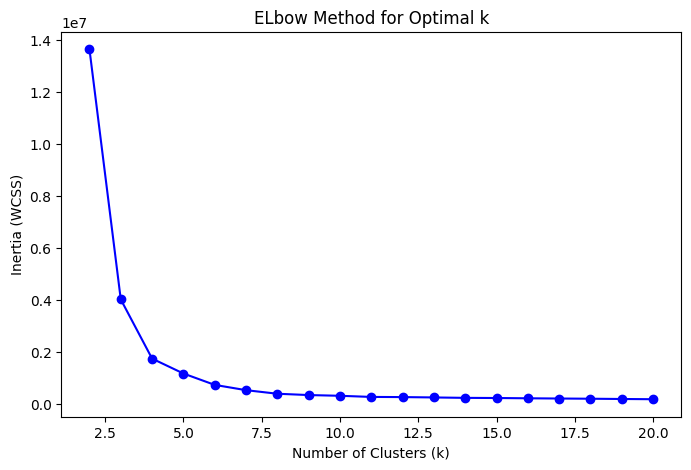

In [ ]:
optimizer = ProductClusteringOptimizer(
        clustering_method='kmeans',
        n_clusters=20  # Small number for demo
    )
optimizer.prepare_features(data)
optimizer.plot_elbow_method(max_k=20)

Clustering Quality Metrics:
- Silhouette Score: 0.857
- Number of Clusters: 4
- Average Cluster Size: 5933.8


Cluster Analysis:

Cluster 0:
  Size: 7301 products
  Subcategories: {'mixed': 2605, 'shampoo': 255, 'conditioner': 206, 'red wine': 188, 'beer': 186, 'liquor rtd': 173, 'ice cream tubs': 173, 'makeup': 119, 'white wine': 114, 'surface cleaners': 111, 'body wash': 102, 'oils': 101, 'grocery milk': 99, 'liquid soap': 84, 'sunscreen': 77, 'deodorants': 76, 'whisky': 72, 'energy/sport/icedtea': 70, 'cordials': 69, 'dishwashing': 68, 'water': 68, 'food storage': 67, 'bread rolls & fbread': 57, 'cleansers': 57, 'moisturiser': 55, 'salad dressings': 55, 'bakery packaged cake': 53, 'eggs': 52, 'serum': 52, 'hair treatments': 52, 'gravy/stock': 47, 'styling products': 43, 'vinegar': 43, 'hair colour': 43, 'gin': 43, 'cold drink': 42, 'fruit juices': 42, 'kitchen needs/bags': 41, 'mouthwash': 39, 'sparkling wine': 38, 'beauty/trial travel': 37, 'desserts (gr)': 35, 'body lotion': 35, '

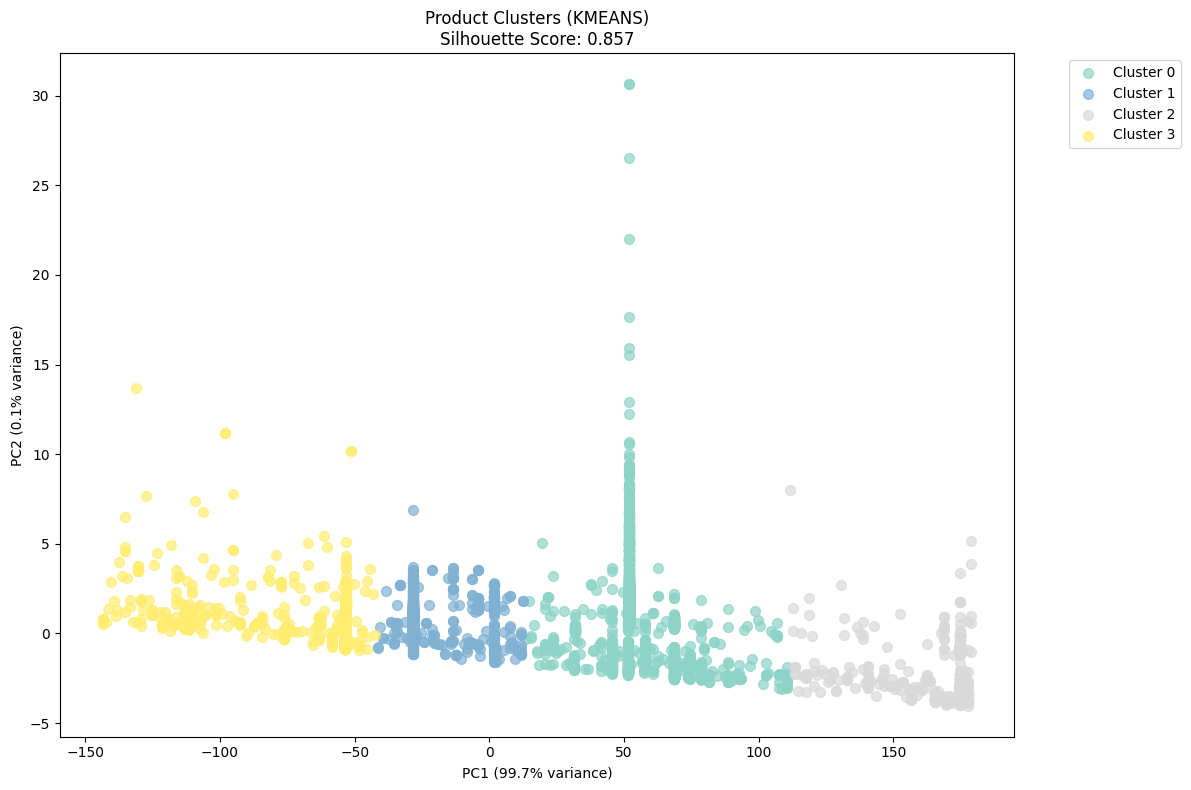

Cart Optimization Demo:
Original cart total: $61.50
Optimized cart total: $24.00
Total savings: $37.50 (61.0%)
Items with alternatives: 6/8

Detailed Recommendations:

coles hot cross buns traditional fruit ($3.00)
  → No cheaper alternatives found

cadbury dairy milk chocolate easter egg hunt carton ($8.00)
  → Recommended: dairy milk hollow chocolate easter egg
    Price: $2.50 (Save $5.50)

cadbury dairy milk easter chocolate eggs bag ($6.70)
  → Recommended: easter fried eggs and bunnies gummies
    Price: $2.50 (Save $4.20)

ferrero rocher chocolate gift box ($9.00)
  → Recommended: fourn twenty frozen meat pies
    Price: $4.50 (Save $4.50)

sensodyne repair protect toothbrush ($3.00)
  → No cheaper alternatives found

maybelline lash sensational sky high washable mascara blackest black ($17.50)
  → Recommended: sensodyne repair protect toothbrush
    Price: $3.00 (Save $14.50)

sensodyne soft daily care toothbrush ($6.30)
  → Recommended: sensodyne repair protect toothbrush
    

In [ ]:
# fit kmeans with optimal clusters
optimizer = ProductClusteringOptimizer(
    clustering_method='kmeans',
    n_clusters=4
)
optimizer.prepare_features(data)
optimizer.fit()

# Show cluster quality metrics
metrics = optimizer.get_cluster_quality_metrics()
print(f"Clustering Quality Metrics:")
print(f"- Silhouette Score: {metrics['silhouette_score']:.3f}")
print(f"- Number of Clusters: {metrics['n_clusters']}")
print(f"- Average Cluster Size: {metrics['avg_cluster_size']:.1f}")
print("\n" + "="*80 + "\n")

# Analyze clusters
print("Cluster Analysis:")
for cluster_id in sorted(optimizer.df['cluster'].unique()):
    if cluster_id >= 0:  # Skip noise points
        analysis = optimizer.analyze_cluster(cluster_id)
        print(f"\nCluster {cluster_id}:")
        print(f"  Size: {analysis['size']} products")
        print(f"  Subcategories: {analysis['subcategories']}")
        print(f"  Brands: {analysis['brands']}")
        print(f"  Price range: ${analysis['price_range']['min']:.2f} - ${analysis['price_range']['max']:.2f}")

print("\n" + "="*80 + "\n")

optimizer.visualize_clusters()

# Demo cart optimization
print("Cart Optimization Demo:")
sample_cart = [8371390, 7107738, 4885191, 7107738, 229828, 1167759,3959190, 8086371]  # Sample cart
cart_results = optimizer.optimize_cart(sample_cart)

print(f"Original cart total: ${cart_results['original_total']:.2f}")
print(f"Optimized cart total: ${cart_results['optimized_total']:.2f}")
print(f"Total savings: ${cart_results['total_savings']:.2f} ({cart_results['savings_percentage']:.1f}%)")
print(f"Items with alternatives: {cart_results['items_with_alternatives']}/{cart_results['total_items']}")

print("\nDetailed Recommendations:")
for product_code, rec in cart_results['recommendations'].items():
    print(f"\n{rec['original_name']} (${rec['original_price']:.2f})")
    if rec['best_alternative']:
        alt = rec['best_alternative']
        print(f"  → Recommended: {alt['name']}")
        print(f"    Price: ${alt['original_price']:.2f} (Save ${alt['savings']:.2f})")
    else:
        print(f"  → No cheaper alternatives found")

substitution_df = optimizer.substitution_summary(cart_results)
print(substitution_df)

In [ ]:
sample_cart = [3801470, 8183899, 1331353]
cart_results = optimizer.optimize_cart(sample_cart)

print(f"Original cart total: ${cart_results['original_total']:.2f}")
print(f"Optimized cart total: ${cart_results['optimized_total']:.2f}")
print(f"Total savings: ${cart_results['total_savings']:.2f} ({cart_results['savings_percentage']:.1f}%)")
print(f"Items with alternatives: {cart_results['items_with_alternatives']}/{cart_results['total_items']}")

print("\nDetailed Recommendations:")
for product_code, rec in cart_results['recommendations'].items():
    print(f"\n{rec['original_name']} (${rec['original_price']:.2f})")
    if rec['best_alternative']:
        alt = rec['best_alternative']
        print(f"  → Recommended: {alt['name']}")
        print(f"    Price: ${alt['original_price']:.2f} (Save ${alt['savings']:.2f})")
    else:
        print(f"  → No cheaper alternatives found")

Original cart total: $19.85
Optimized cart total: $9.60
Total savings: $10.25 (51.6%)
Items with alternatives: 3/3

Detailed Recommendations:

944 pvc duct tape silver ($6.85)
  → Recommended: 2010 beige masking tape 24mm
    Price: $5.35 (Save $1.50)

container ($3.00)
  → Recommended: container
    Price: $2.25 (Save $0.75)

coconut exotic tropical dry shampoo ($10.00)
  → Recommended: fruits apple fresh shampoo
    Price: $2.00 (Save $8.00)


The algorithm has improved significantly interms of suggesting product alternatives for a given product when the subcategories are more well defined.